## **DBSCAN Example**

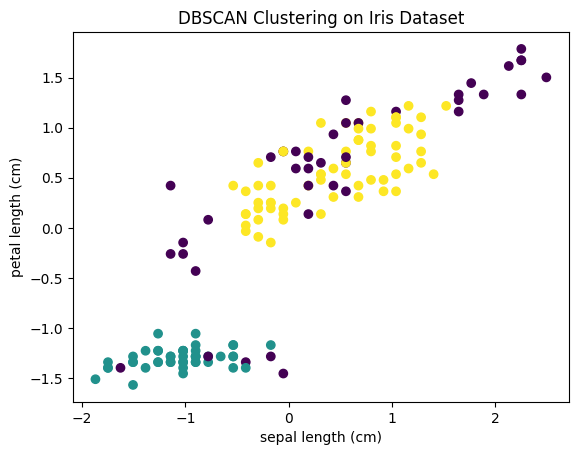

In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

# Load the iris dataset
iris = load_iris()
X=iris.data 
y=iris.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DBSCAN object
dbscan = DBSCAN(eps=0.47, min_samples=4) # play with eps and min_samples

# Fit the model
dbscan.fit(X_scaled)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('DBSCAN Clustering on Iris Dataset')
plt.show()


## **OPTICS:**

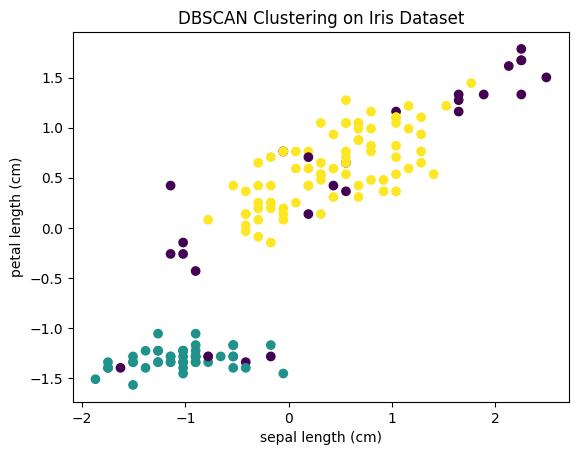

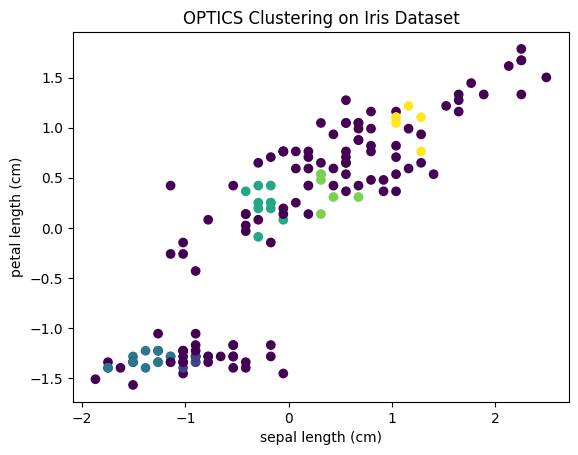

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

# Load the iris dataset
iris = load_iris()
X=iris.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(X_scaled)

# Create the OPTICS object
optics = OPTICS(min_samples=5, xi=0.05)

# Fit the model
dbscan.fit(X_scaled)
optics.fit(X_scaled)

# Plot the data points with color-coded clusters for DBSCAN
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('DBSCAN Clustering on Iris Dataset')
plt.show()

# Plot the data points with color-coded clusters for OPTICS
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=optics.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('OPTICS Clustering on Iris Dataset')
plt.show()





## **Hyperparameters for DBSCAN**

A k-distance plot, also known as k-distance graph, is a useful tool for determining the appropriate epsilon value when using the DBSCAN algorithm. The idea behind a k-distance plot is to plot the distance to the kth nearest neighbor for each point, sort the distances, and then look for the 'elbow' or 'knee' in the plot. The values of epsilon can be chosen as the y-coordinate of this 'elbow' point.

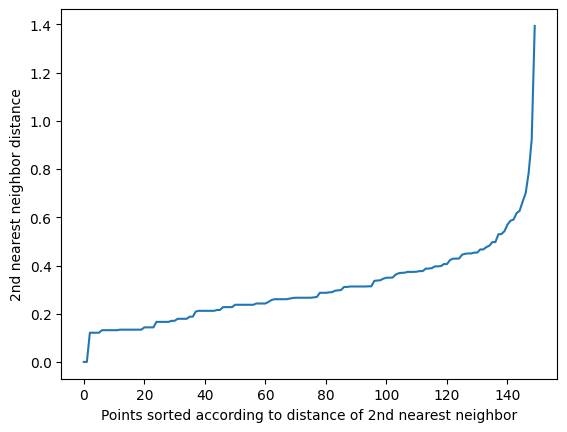

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from kneed import KneeLocator

# Load the 'iris' dataset
df = sns.load_dataset('iris')

# Normalize the features 
features= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features=StandardScaler().fit_transform(features)

# Find the nearest neighbors 
nbrs = NearestNeighbors(n_neighbors=2).fit(features)
distances, indices = nbrs.kneighbors(features)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbor')
plt.ylabel('2nd nearest neighbor distance')
plt.show()

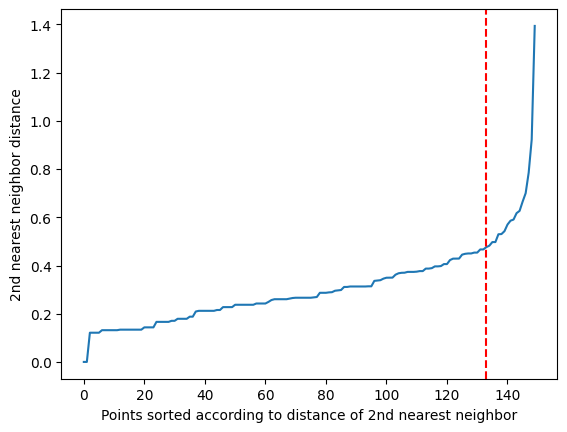

Suggested value of eps: 0.4760712736677158


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from kneed import KneeLocator

# Load the 'iris' dataset
df = sns.load_dataset('iris')

# Normalize the features 
features= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features=StandardScaler().fit_transform(features)

# Find the nearest neighbors 
nbrs = NearestNeighbors(n_neighbors=2).fit(features)
distances, indices = nbrs.kneighbors(features)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Identify the "elbow" in the k-distance plot 
kneedle=KneeLocator(range(1,len(distances)+1), distances, S=1.0, curve='convex',direction='increasing')
elbow_index=kneedle.elbow

# Plot the k-distance plot 
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbor')
plt.ylabel('2nd nearest neighbor distance')

# Add a vertical line at the elbow point 
plt.axvline(x=elbow_index, color='r', linestyle='--')
plt.show()

# print the value of 'eps'
print('Suggested value of eps:', distances[elbow_index])

## **How to find the best num of MinPts**


### Coding methods: 

One simple method is to use a grid search to experiment with different values of minPts and evaluate the results using a suitable clustering evaluation metric, like Sillhouette score, Davies-Bouldin index or the Celinski-Harabasz index. 

Here is an example using the Iris dataset and the Sillhouette score:

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import numpy as np 

# Load the 'iris' dataset
df = sns.load_dataset('iris')

# Normalize the features
features= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features=StandardScaler().fit_transform(features)

# Use the previously calculated 'eps' (from the k-distance plot)
eps=0.5 # replace with your calculated value 

# Define the range for 'minPts'
minPts_range=range(2,11)

# Initialize the variables to score the best 'minPts' and the corresponding 'sillhouette score'
best_minPts=-1
best_sillhouette=-float('inf')

# Grid Search over the 'minPts'  range 
for minPts in minPts_range:
    dbscan = DBSCAN(eps=eps, min_samples=minPts) 
    labels=dbscan.fit_predict(features)
    # ignore evaluation if no clusters were found 
    if len(np.unique(labels))<2 or (labels==-1).all():
        continue
    sillhouette=silhouette_score(features, labels)
    print(f'minPts:{minPts}, silhouette score:{sillhouette}')

    if sillhouette>best_sillhouette:
        best_minPts=minPts
        best_sillhouette=sillhouette
print(f'best minPts:{best_minPts}, silhouette score:{best_sillhouette}')


minPts:2, silhouette score:0.1150059338947623
minPts:3, silhouette score:0.15971036873870176
minPts:4, silhouette score:0.36457435678297534
minPts:5, silhouette score:0.35651648142700726
minPts:6, silhouette score:0.1958665929942779
minPts:7, silhouette score:0.1391483140504277
minPts:8, silhouette score:0.18821743063720223
minPts:9, silhouette score:0.06932089894577982
minPts:10, silhouette score:0.009426257445526207
best minPts:4, silhouette score:0.36457435678297534
